In [1]:
import pandas as pd

df = pd.read_csv('advertising_SALES-PREDICTION.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [2]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [3]:
print(df.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


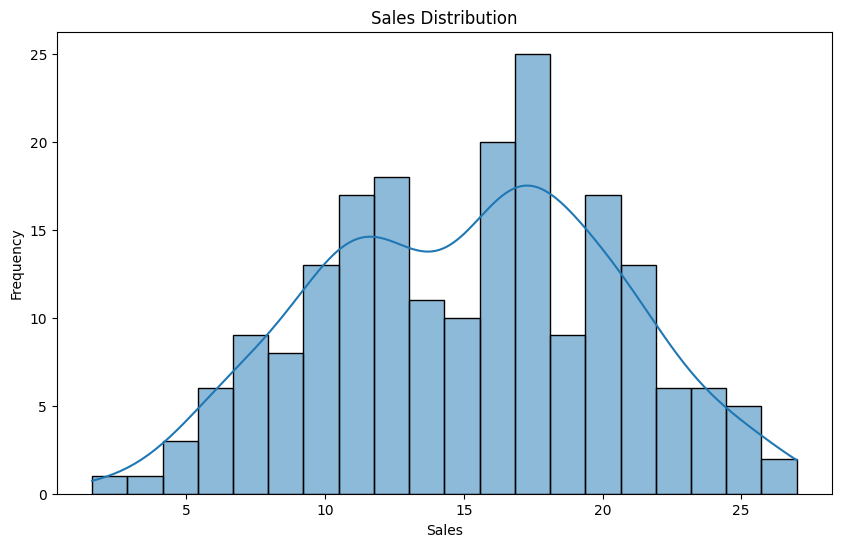

c:\Users\hp2023\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


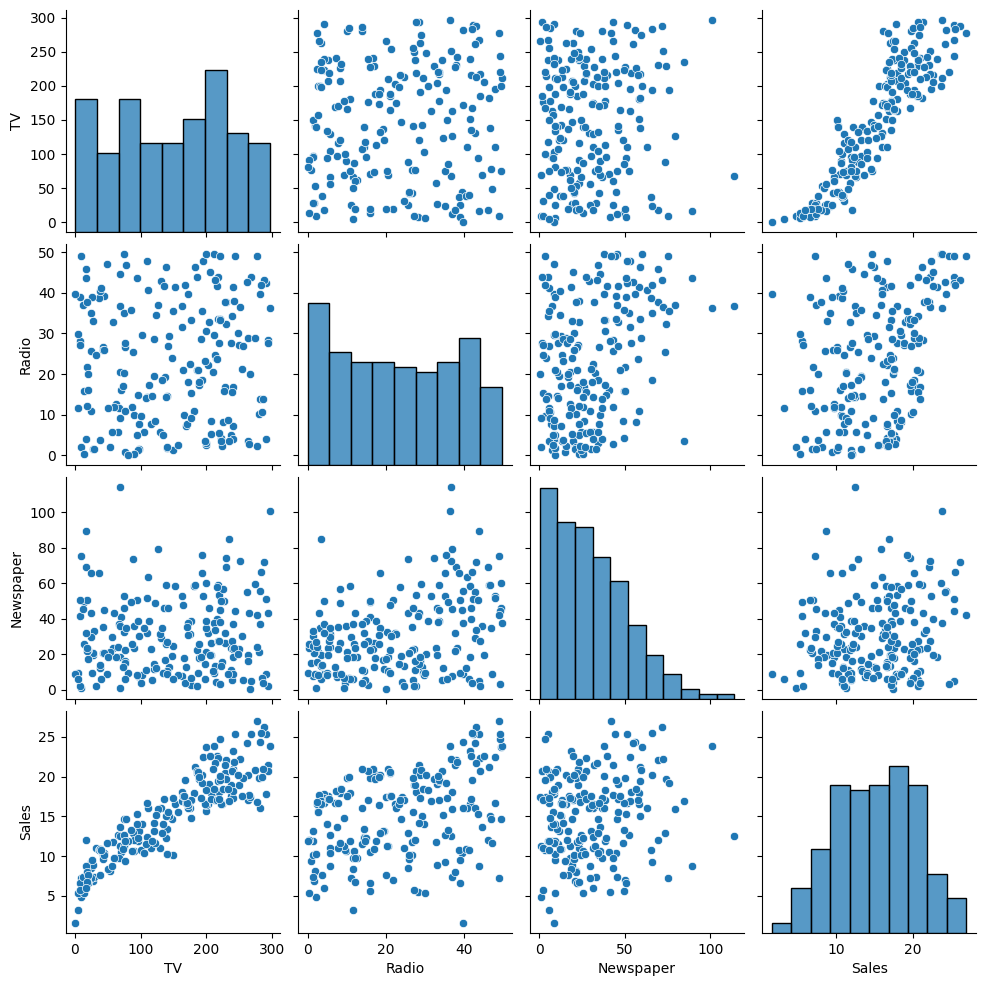

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = df

# Visualize the distribution of the target variable 'Sales'
plt.figure(figsize=(10, 6))
sns.histplot(data['Sales'], bins=20, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Visualize relationships between numerical variables
sns.pairplot(data)
plt.show()



*Questions*

What is the overall trend in advertising spending across TV, Radio, and Newspaper in this dataset?

Is there a correlation between the amount spent on TV advertising and the sales revenue generated?

Which advertising platform appears to have the highest return on investment (ROI) in terms of sales revenue generated for each dollar spent?

Are there any outliers in the dataset that significantly impact the relationship between advertising expenditure and sales?

Can you predict sales based on a combination of advertising expenditures on TV, Radio, and Newspaper? If so, what is the best predictive model?

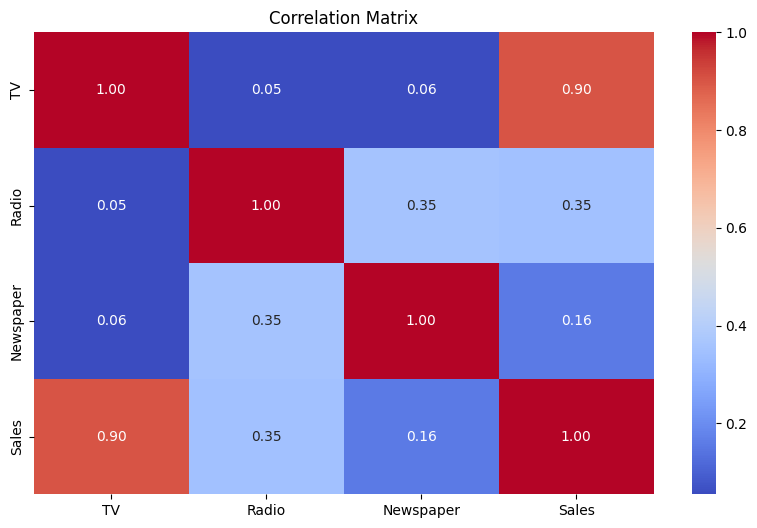

In [10]:
# Visualize correlations between variables
correlation_matrix = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

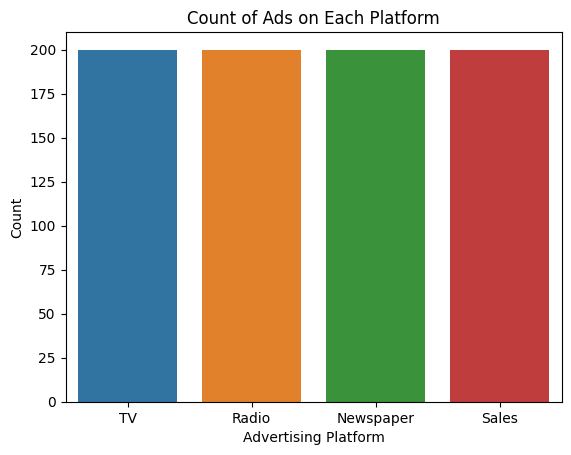

In [13]:
# Visualize relationships between categorical variables
sns.countplot(data)
plt.title('Count of Ads on Each Platform')
plt.xlabel('Advertising Platform')
plt.ylabel('Count')
plt.show()


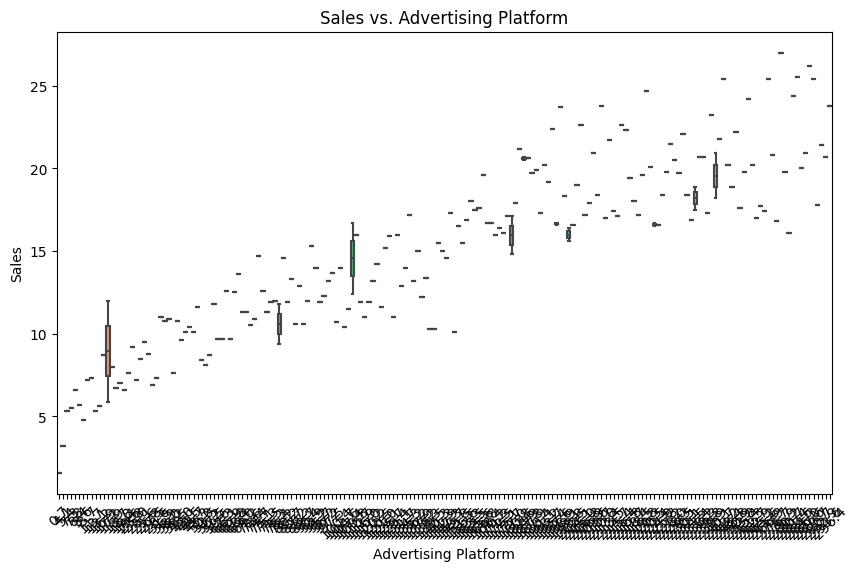

In [12]:

# Visualize the relationship between numerical and categorical variables
plt.figure(figsize=(10, 6))
sns.boxplot(x='TV', y='Sales', data=data)
plt.title('Sales vs. Advertising Platform')
plt.xlabel('Advertising Platform')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

Applying Model accourding to the Dataset

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into features (X) and target (y)
X = df.drop("Sales", axis=1)
y = df["Sales"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 1.4374328500000009
R-squared: 0.9534827934927883
